In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import shap 


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [16]:
df = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned_no_weight.csv")

In [17]:
X = df.drop(columns=['Winner'])
y= df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#checking number of features
print(X_train.shape)

(4411, 145)


In [19]:
print(y_train.dtype)
print(y_train.head())


int64
3235    1
82      0
4081    1
1030    1
3892    0
Name: Winner, dtype: int64


In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


y_train_encoded = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
#neural network

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train_encoded, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


    

C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\3134071260.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\3134071260.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


In [55]:
class Net1(nn.Module):
    def __init__(self, input_size):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [56]:
input_size = 145  
model1 = Net1(input_size)

criterion = nn.BCELoss()  
optimizer = optim.Adam(model1.parameters(), lr=0.001) 

num_epochs = 50  
model1.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad() 
        outputs = model1(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward()  
        optimizer.step()  

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


model1.eval()
with torch.no_grad():
    outputs1 = model1(X_test)
    predictions1 = (outputs1.numpy() > 0.5).astype(int)

Epoch 1/50, Loss: 0.6500
Epoch 2/50, Loss: 0.5717
Epoch 3/50, Loss: 0.5167
Epoch 4/50, Loss: 0.4819
Epoch 5/50, Loss: 0.4564
Epoch 6/50, Loss: 0.4295
Epoch 7/50, Loss: 0.4091
Epoch 8/50, Loss: 0.3823
Epoch 9/50, Loss: 0.3636
Epoch 10/50, Loss: 0.3483
Epoch 11/50, Loss: 0.3289
Epoch 12/50, Loss: 0.3105
Epoch 13/50, Loss: 0.2907
Epoch 14/50, Loss: 0.2688
Epoch 15/50, Loss: 0.2568
Epoch 16/50, Loss: 0.2546
Epoch 17/50, Loss: 0.2246
Epoch 18/50, Loss: 0.2132
Epoch 19/50, Loss: 0.2088
Epoch 20/50, Loss: 0.1932
Epoch 21/50, Loss: 0.1776
Epoch 22/50, Loss: 0.1657
Epoch 23/50, Loss: 0.1461
Epoch 24/50, Loss: 0.1465
Epoch 25/50, Loss: 0.1500
Epoch 26/50, Loss: 0.1225
Epoch 27/50, Loss: 0.1153
Epoch 28/50, Loss: 0.1026
Epoch 29/50, Loss: 0.1159
Epoch 30/50, Loss: 0.1099
Epoch 31/50, Loss: 0.0981
Epoch 32/50, Loss: 0.0930
Epoch 33/50, Loss: 0.0791
Epoch 34/50, Loss: 0.0752
Epoch 35/50, Loss: 0.0670
Epoch 36/50, Loss: 0.0662
Epoch 37/50, Loss: 0.0788
Epoch 38/50, Loss: 0.0791
Epoch 39/50, Loss: 0.

In [57]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, predictions1))
print('Precision:', precision_score(y_test, predictions1))
print('Recall:', recall_score(y_test, predictions1))
print('F1 Score:', f1_score(y_test, predictions1))
print('ROC AUC Score:', roc_auc_score(y_test, predictions1))

Accuracy: 0.6155938349954669
Precision: 0.4639443961772372
Recall: 0.44911690496215306
F1 Score: 0.4564102564102564
ROC AUC Score: 0.5790395845565482


In [58]:
print(f'Length of y_test: {len(y_test)}')
print(f'Length of predictions1: {len(predictions1)}')


Length of y_test: 3309
Length of predictions1: 3309


In [60]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, predictions1)

print(conf_matrix)

[[1503  617]
 [ 655  534]]


In [25]:
#oversampling minority class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [48]:

class Net2(nn.Module):
    def __init__(self, input_size):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x
    
input_size = 145  
model2 = Net2(input_size)

criterion = nn.BCELoss()  
optimizer = optim.Adam(model2.parameters(), lr=0.001) 


num_epochs = 50  
model2.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad() 
        outputs = model2(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward()
        optimizer.step() 

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


model2.eval()
with torch.no_grad():
    outputs2 = model2(X_test)
    predictions2 = (outputs2.numpy() > 0.5).astype(int)

Epoch 1/50, Loss: 0.6517
Epoch 2/50, Loss: 0.5717
Epoch 3/50, Loss: 0.5236
Epoch 4/50, Loss: 0.4844
Epoch 5/50, Loss: 0.4575
Epoch 6/50, Loss: 0.4364
Epoch 7/50, Loss: 0.4092
Epoch 8/50, Loss: 0.3933
Epoch 9/50, Loss: 0.3675
Epoch 10/50, Loss: 0.3375
Epoch 11/50, Loss: 0.3365
Epoch 12/50, Loss: 0.3042
Epoch 13/50, Loss: 0.2851
Epoch 14/50, Loss: 0.2663
Epoch 15/50, Loss: 0.2538
Epoch 16/50, Loss: 0.2358
Epoch 17/50, Loss: 0.2288
Epoch 18/50, Loss: 0.2111
Epoch 19/50, Loss: 0.1949
Epoch 20/50, Loss: 0.1778
Epoch 21/50, Loss: 0.1670
Epoch 22/50, Loss: 0.1598
Epoch 23/50, Loss: 0.1429
Epoch 24/50, Loss: 0.1422
Epoch 25/50, Loss: 0.1325
Epoch 26/50, Loss: 0.1237
Epoch 27/50, Loss: 0.1135
Epoch 28/50, Loss: 0.0994
Epoch 29/50, Loss: 0.0887
Epoch 30/50, Loss: 0.0822
Epoch 31/50, Loss: 0.0807
Epoch 32/50, Loss: 0.0779
Epoch 33/50, Loss: 0.0671
Epoch 34/50, Loss: 0.0708
Epoch 35/50, Loss: 0.0791
Epoch 36/50, Loss: 0.0756
Epoch 37/50, Loss: 0.0838
Epoch 38/50, Loss: 0.0744
Epoch 39/50, Loss: 0.

In [49]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, predictions2))
print('Precision:', precision_score(y_test, predictions2))
print('Recall:', recall_score(y_test, predictions2))
print('F1 Score:', f1_score(y_test, predictions2))
print('ROC AUC Score:', roc_auc_score(y_test, predictions2))

Accuracy: 0.6013901480809912
Precision: 0.44921875
Recall: 0.48359966358284273
F1 Score: 0.46577561765897124
ROC AUC Score: 0.575526246885761


In [62]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, predictions2)

print(conf_matrix)

[[1415  705]
 [ 614  575]]


In [29]:
train_features = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Correct placement of unsqueeze
test_features = torch.tensor(X_test, dtype=torch.float32)

train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\1189486903.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_features = torch.tensor(X_train, dtype=torch.float32)
C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\1189486903.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Correct placement of unsqueeze
C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\1189486903.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_features = torch.tensor(X_test, dty

In [30]:
class DeepNet1(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 145
deep_model1 = DeepNet1(input_dim)

loss_function1 = nn.BCELoss()
optimizer1 = optim.Adam(deep_model1.parameters(), lr=0.001)

total_epochs = 50
deep_model1.train()
for epoch_num in range(total_epochs):
    accumulated_loss1 = 0.0
    for batch_features, batch_labels in train_loader_unique:
        batch_labels = batch_labels.view(-1,1)  # Remove extra dimensions if any
        optimizer1.zero_grad()
        batch_outputs = deep_model1(batch_features)
        batch_loss = loss_function1(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer1.step()

        accumulated_loss1 += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss1 = accumulated_loss1 / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss1:.4f}')

deep_model1.eval()
with torch.no_grad():
    test_outputs1 = deep_model1(test_features)
    test_predictions1 = (test_outputs1.numpy() > 0.5).astype(int)



Epoch 1/50, Loss: 0.6580
Epoch 2/50, Loss: 0.5677
Epoch 3/50, Loss: 0.5094
Epoch 4/50, Loss: 0.4615
Epoch 5/50, Loss: 0.4229
Epoch 6/50, Loss: 0.4023
Epoch 7/50, Loss: 0.3680
Epoch 8/50, Loss: 0.3269
Epoch 9/50, Loss: 0.2991
Epoch 10/50, Loss: 0.2797
Epoch 11/50, Loss: 0.2507
Epoch 12/50, Loss: 0.2197
Epoch 13/50, Loss: 0.2008
Epoch 14/50, Loss: 0.1667
Epoch 15/50, Loss: 0.1565
Epoch 16/50, Loss: 0.1351
Epoch 17/50, Loss: 0.1263
Epoch 18/50, Loss: 0.1225
Epoch 19/50, Loss: 0.0954
Epoch 20/50, Loss: 0.0926
Epoch 21/50, Loss: 0.0823
Epoch 22/50, Loss: 0.0679
Epoch 23/50, Loss: 0.0898
Epoch 24/50, Loss: 0.0747
Epoch 25/50, Loss: 0.0540
Epoch 26/50, Loss: 0.0822
Epoch 27/50, Loss: 0.0687
Epoch 28/50, Loss: 0.0364
Epoch 29/50, Loss: 0.0571
Epoch 30/50, Loss: 0.1433
Epoch 31/50, Loss: 0.0407
Epoch 32/50, Loss: 0.0382
Epoch 33/50, Loss: 0.0362
Epoch 34/50, Loss: 0.0611
Epoch 35/50, Loss: 0.0999
Epoch 36/50, Loss: 0.0405
Epoch 37/50, Loss: 0.0532
Epoch 38/50, Loss: 0.0686
Epoch 39/50, Loss: 0.

In [31]:
print('Accuracy:', accuracy_score(y_test, test_predictions1))
print('Precision:', precision_score(y_test, test_predictions1))
print('Recall:', recall_score(y_test, test_predictions1))
print('F1 Score:', f1_score(y_test, test_predictions1))
print('ROC AUC Score:', roc_auc_score(y_test, test_predictions1))


Accuracy: 0.6288909035962527
Precision: 0.4790996784565916
Recall: 0.375946173254836
F1 Score: 0.4213006597549482
ROC AUC Score: 0.5733504451179839


In [63]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions1)

print(conf_matrix)

[[1634  486]
 [ 742  447]]


In [32]:
train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

class DeepNet2(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 145
deep_model2 = DeepNet2(input_dim)

loss_function2 = nn.BCELoss()
optimizer2 = optim.Adam(deep_model2.parameters(), lr=0.001)

total_epochs = 50
deep_model2.train()
for epoch_num in range(total_epochs):
    accumulated_loss2 = 0.0
    for batch_features, batch_labels in train_loader_unique:
        batch_labels = batch_labels.view(-1,1)  # Remove extra dimensions if any
        optimizer2.zero_grad()
        batch_outputs = deep_model2(batch_features)
        batch_loss = loss_function2(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer2.step()

        accumulated_loss2 += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss2 = accumulated_loss2 / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss2:.4f}')

deep_model2.eval()
with torch.no_grad():
    test_outputs2 = deep_model2(test_features)
    test_predictions2 = (test_outputs2.numpy() > 0.5).astype(int)



Epoch 1/50, Loss: 0.6582
Epoch 2/50, Loss: 0.5741
Epoch 3/50, Loss: 0.5035
Epoch 4/50, Loss: 0.4630
Epoch 5/50, Loss: 0.4275
Epoch 6/50, Loss: 0.3975
Epoch 7/50, Loss: 0.3752
Epoch 8/50, Loss: 0.3399
Epoch 9/50, Loss: 0.3031
Epoch 10/50, Loss: 0.2756
Epoch 11/50, Loss: 0.2557
Epoch 12/50, Loss: 0.2286
Epoch 13/50, Loss: 0.1997
Epoch 14/50, Loss: 0.1804
Epoch 15/50, Loss: 0.1553
Epoch 16/50, Loss: 0.1382
Epoch 17/50, Loss: 0.1263
Epoch 18/50, Loss: 0.1203
Epoch 19/50, Loss: 0.1127
Epoch 20/50, Loss: 0.0937
Epoch 21/50, Loss: 0.0897
Epoch 22/50, Loss: 0.0829
Epoch 23/50, Loss: 0.0901
Epoch 24/50, Loss: 0.0659
Epoch 25/50, Loss: 0.0565
Epoch 26/50, Loss: 0.0879
Epoch 27/50, Loss: 0.0616
Epoch 28/50, Loss: 0.0741
Epoch 29/50, Loss: 0.0514
Epoch 30/50, Loss: 0.0580
Epoch 31/50, Loss: 0.0634
Epoch 32/50, Loss: 0.0647
Epoch 33/50, Loss: 0.0551
Epoch 34/50, Loss: 0.0527
Epoch 35/50, Loss: 0.0519
Epoch 36/50, Loss: 0.0721
Epoch 37/50, Loss: 0.0401
Epoch 38/50, Loss: 0.0357
Epoch 39/50, Loss: 0.

In [33]:
print('Accuracy:', accuracy_score(y_test, test_predictions2))
print('Precision:', precision_score(y_test, test_predictions2))
print('Recall:', recall_score(y_test, test_predictions2))
print('F1 Score:', f1_score(y_test, test_predictions2))
print('ROC AUC Score:', roc_auc_score(y_test, test_predictions2))
print('Confusion Matrix:', confusion_matrix(y_test, test_predictions2))
print('Classification Report:', classification_report(y_test, test_predictions2))


Accuracy: 0.6252644303414929
Precision: 0.47335423197492166
Recall: 0.3809924306139613
F1 Score: 0.42218080149114634
ROC AUC Score: 0.5716282907786788
Confusion Matrix: [[1616  504]
 [ 736  453]]
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.76      0.72      2120
           1       0.47      0.38      0.42      1189

    accuracy                           0.63      3309
   macro avg       0.58      0.57      0.57      3309
weighted avg       0.61      0.63      0.61      3309



In [34]:
train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

class DeepNet3(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet3, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.layer4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.layer5 = nn.Linear(32, 16)
        self.bn5 = nn.BatchNorm1d(16)
        self.output_layer = nn.Linear(16, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.dropout(self.activation(self.bn1(self.layer1(x))))
        x = self.dropout(self.activation(self.bn2(self.layer2(x))))
        x = self.dropout(self.activation(self.bn3(self.layer3(x))))
        x = self.dropout(self.activation(self.bn4(self.layer4(x))))
        x = self.dropout(self.activation(self.bn5(self.layer5(x))))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 145
deep_model3 = DeepNet3(input_dim)

loss_function3 = nn.BCELoss()
optimizer3 = optim.Adam(deep_model3.parameters(), lr=0.001)

total_epochs = 50
deep_model3.train()
for epoch_num in range(total_epochs):
    accumulated_loss3 = 0.0
    for batch_features, batch_labels in train_loader_unique:
        batch_labels = batch_labels.view(-1,1)  
        optimizer3.zero_grad()
        batch_outputs = deep_model3(batch_features)
        batch_loss = loss_function3(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer3.step()

        accumulated_loss3 += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss3 = accumulated_loss3 / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss3:.4f}')

deep_model3.eval()
with torch.no_grad():
    test_outputs3 = deep_model3(test_features)
    test_predictions3 = (test_outputs3.numpy() > 0.5).astype(int)



Epoch 1/50, Loss: 0.7075
Epoch 2/50, Loss: 0.6986
Epoch 3/50, Loss: 0.6791
Epoch 4/50, Loss: 0.6669
Epoch 5/50, Loss: 0.6591
Epoch 6/50, Loss: 0.6437
Epoch 7/50, Loss: 0.6292
Epoch 8/50, Loss: 0.6146
Epoch 9/50, Loss: 0.5996
Epoch 10/50, Loss: 0.5909
Epoch 11/50, Loss: 0.5725
Epoch 12/50, Loss: 0.5700
Epoch 13/50, Loss: 0.5594
Epoch 14/50, Loss: 0.5573
Epoch 15/50, Loss: 0.5471
Epoch 16/50, Loss: 0.5391
Epoch 17/50, Loss: 0.5227
Epoch 18/50, Loss: 0.5246
Epoch 19/50, Loss: 0.5165
Epoch 20/50, Loss: 0.5289
Epoch 21/50, Loss: 0.5154
Epoch 22/50, Loss: 0.5084
Epoch 23/50, Loss: 0.5069
Epoch 24/50, Loss: 0.4985
Epoch 25/50, Loss: 0.4925
Epoch 26/50, Loss: 0.4864
Epoch 27/50, Loss: 0.4804
Epoch 28/50, Loss: 0.4847
Epoch 29/50, Loss: 0.4782
Epoch 30/50, Loss: 0.4699
Epoch 31/50, Loss: 0.4704
Epoch 32/50, Loss: 0.4661
Epoch 33/50, Loss: 0.4678
Epoch 34/50, Loss: 0.4606
Epoch 35/50, Loss: 0.4677
Epoch 36/50, Loss: 0.4545
Epoch 37/50, Loss: 0.4545
Epoch 38/50, Loss: 0.4591
Epoch 39/50, Loss: 0.

Accuracy: 0.642792384406165
Precision: 0.5030355594102341
Recall: 0.4878048780487805
F1 Score: 0.49530315969257044
ROC AUC Score: 0.6087609295904279
Confusion Matrix: [[1547  573]
 [ 609  580]]
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.73      0.72      2120
           1       0.50      0.49      0.50      1189

    accuracy                           0.64      3309
   macro avg       0.61      0.61      0.61      3309
weighted avg       0.64      0.64      0.64      3309



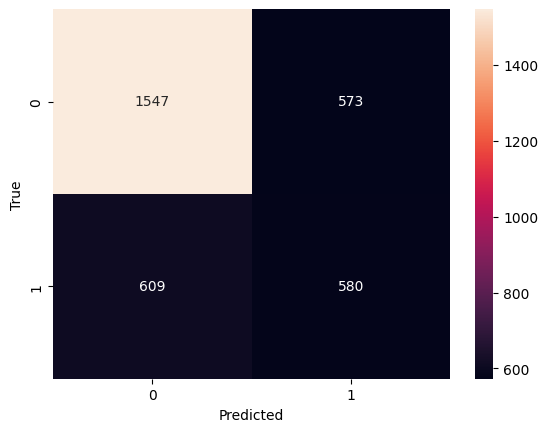

In [35]:
print('Accuracy:', accuracy_score(y_test, test_predictions3))
print('Precision:', precision_score(y_test, test_predictions3))
print('Recall:', recall_score(y_test, test_predictions3))
print('F1 Score:', f1_score(y_test, test_predictions3))
print('ROC AUC Score:', roc_auc_score(y_test, test_predictions3))
print('Confusion Matrix:', confusion_matrix(y_test, test_predictions3))
print('Classification Report:', classification_report(y_test, test_predictions3))

#confusion matrix
cm2 = confusion_matrix(y_test, test_predictions3)
sns.heatmap(cm2, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [36]:
#saving the model
torch.save(deep_model3.state_dict(), 'C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/deep_model.pth')

In [39]:
train_features = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
test_features = torch.tensor(X_test, dtype=torch.float32)

if train_labels.dim() > 2:
    train_labels = train_labels.squeeze(-1)

train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

class DeepNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.layer6 = nn.Linear(32, 16)
        self.layer7 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.activation(self.layer6(x))
        x = self.activation(self.layer7(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 145
deep_model = DeepNet(input_dim)

loss_function = nn.BCELoss()
optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)

total_epochs = 50
deep_model.train()
for epoch_num in range(total_epochs):
    accumulated_loss = 0.0
    for batch_features, batch_labels in train_loader_unique:
        optimizer_unique.zero_grad()
        batch_outputs = deep_model(batch_features)
        batch_loss = loss_function(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer_unique.step()

        accumulated_loss += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

deep_model.eval()
with torch.no_grad():
    test_outputs = deep_model(test_features)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)

C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\4242420197.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_features = torch.tensor(X_train, dtype=torch.float32)
C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\4242420197.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
C:\Users\kisha\AppData\Local\Temp\ipykernel_89916\4242420197.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_features = torch.tensor(X_test, dtype=torch.float32)


Epoch 1/50, Loss: 0.6688
Epoch 2/50, Loss: 0.5791
Epoch 3/50, Loss: 0.5244
Epoch 4/50, Loss: 0.4826
Epoch 5/50, Loss: 0.4489
Epoch 6/50, Loss: 0.4183
Epoch 7/50, Loss: 0.3943
Epoch 8/50, Loss: 0.3576
Epoch 9/50, Loss: 0.3347
Epoch 10/50, Loss: 0.3133
Epoch 11/50, Loss: 0.2766
Epoch 12/50, Loss: 0.2746
Epoch 13/50, Loss: 0.2390
Epoch 14/50, Loss: 0.2150
Epoch 15/50, Loss: 0.1776
Epoch 16/50, Loss: 0.1644
Epoch 17/50, Loss: 0.1548
Epoch 18/50, Loss: 0.1418
Epoch 19/50, Loss: 0.1263
Epoch 20/50, Loss: 0.1117
Epoch 21/50, Loss: 0.1241
Epoch 22/50, Loss: 0.0945
Epoch 23/50, Loss: 0.0918
Epoch 24/50, Loss: 0.0860
Epoch 25/50, Loss: 0.0860
Epoch 26/50, Loss: 0.0856
Epoch 27/50, Loss: 0.0695
Epoch 28/50, Loss: 0.0720
Epoch 29/50, Loss: 0.0683
Epoch 30/50, Loss: 0.0610
Epoch 31/50, Loss: 0.0724
Epoch 32/50, Loss: 0.0500
Epoch 33/50, Loss: 0.0574
Epoch 34/50, Loss: 0.0501
Epoch 35/50, Loss: 0.0489
Epoch 36/50, Loss: 0.0463
Epoch 37/50, Loss: 0.0567
Epoch 38/50, Loss: 0.0499
Epoch 39/50, Loss: 0.

In [40]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, test_predictions))
print('Precision:', precision_score(y_test, test_predictions))
print('Recall:', recall_score(y_test, test_predictions))
print('F1 Score:', f1_score(y_test, test_predictions))


Accuracy: 0.6134783922635237
Precision: 0.46017699115044247
Recall: 0.4373423044575273
F1 Score: 0.44846916774471757


In [41]:

class DeepNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 2048)
        self.layer2 = nn.Linear(2048, 1024)
        self.layer3 = nn.Linear(1024, 512)
        self.layer4 = nn.Linear(512, 256)
        self.layer5 = nn.Linear(256, 128)
        self.layer6 = nn.Linear(128, 64)
        self.layer7 = nn.Linear(64, 32)
        self.layer8 = nn.Linear(32, 16)
        self.layer9 = nn.Linear(16, 8)
        self.layer10 = nn.Linear(8, 4)
        self.layer11 = nn.Linear(4, 2)
        self.output_layer = nn.Linear(2, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.activation(self.layer6(x))
        x = self.activation(self.layer7(x))
        x = self.activation(self.layer8(x))
        x = self.activation(self.layer9(x))
        x = self.activation(self.layer10(x))
        x = self.activation(self.layer11(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 145
deep_model = DeepNet(input_dim)

loss_function = nn.BCELoss()
optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)

total_epochs = 100
deep_model.train()
for epoch_num in range(total_epochs):
    accumulated_loss = 0.0
    for batch_features, batch_labels in train_loader_unique:
        optimizer_unique.zero_grad()
        batch_outputs = deep_model(batch_features)
        batch_loss = loss_function(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer_unique.step()

        accumulated_loss += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

deep_model.eval()
with torch.no_grad():
    test_outputs = deep_model(test_features)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)

Epoch 1/100, Loss: 0.6852
Epoch 2/100, Loss: 0.6754
Epoch 3/100, Loss: 0.6704
Epoch 4/100, Loss: 0.6639
Epoch 5/100, Loss: 0.6537
Epoch 6/100, Loss: 0.6484
Epoch 7/100, Loss: 0.6451
Epoch 8/100, Loss: 0.6431
Epoch 9/100, Loss: 0.6235
Epoch 10/100, Loss: 0.5846
Epoch 11/100, Loss: 0.5376
Epoch 12/100, Loss: 0.5136
Epoch 13/100, Loss: 0.4937
Epoch 14/100, Loss: 0.4815
Epoch 15/100, Loss: 0.4627
Epoch 16/100, Loss: 0.4430
Epoch 17/100, Loss: 0.4253
Epoch 18/100, Loss: 0.4121
Epoch 19/100, Loss: 0.3995
Epoch 20/100, Loss: 0.3863
Epoch 21/100, Loss: 0.3600
Epoch 22/100, Loss: 0.3853
Epoch 23/100, Loss: 0.3535
Epoch 24/100, Loss: 0.3428
Epoch 25/100, Loss: 0.3280
Epoch 26/100, Loss: 0.3311
Epoch 27/100, Loss: 0.3191
Epoch 28/100, Loss: 0.3125
Epoch 29/100, Loss: 0.2934
Epoch 30/100, Loss: 0.2943
Epoch 31/100, Loss: 0.2881
Epoch 32/100, Loss: 0.2600
Epoch 33/100, Loss: 0.2718
Epoch 34/100, Loss: 0.2679
Epoch 35/100, Loss: 0.2502
Epoch 36/100, Loss: 0.2623
Epoch 37/100, Loss: 0.2537
Epoch 38/1

In [42]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, test_predictions))
print('Precision:', precision_score(y_test, test_predictions))
print('Recall:', recall_score(y_test, test_predictions))
print('F1 Score:', f1_score(y_test, test_predictions))


Accuracy: 0.6307041402236325
Precision: 0.4820457018498368
Recall: 0.3725820016820858
F1 Score: 0.42030360531309297


In [43]:
class DeepNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 4096)
        self.layer2 = nn.Linear(4096, 2048)
        self.layer3 = nn.Linear(2048, 1024)
        self.layer4 = nn.Linear(1024, 512)
        self.layer5 = nn.Linear(512, 256)
        self.layer6 = nn.Linear(256, 128)
        self.layer7 = nn.Linear(128, 64)
        self.layer8 = nn.Linear(64, 32)
        self.layer9 = nn.Linear(32, 16)
        self.layer10 = nn.Linear(16, 8)
        self.layer11 = nn.Linear(8, 4)
        self.layer12 = nn.Linear(4, 1)  # Adjusted to match the expected output size
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.activation(self.layer6(x))
        x = self.activation(self.layer7(x))
        x = self.activation(self.layer8(x))
        x = self.activation(self.layer9(x))
        x = self.activation(self.layer10(x))
        x = self.activation(self.layer11(x))
        x = self.output_activation(self.layer12(x))
        return x

input_dim = 145
deep_model = DeepNet(input_dim)

loss_function = nn.BCELoss()
optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)

total_epochs = 1000
deep_model.train()
for epoch_num in range(total_epochs):
    accumulated_loss = 0.0
    for batch_features, batch_labels in train_loader_unique:
        optimizer_unique.zero_grad()
        batch_outputs = deep_model(batch_features)
        batch_loss = loss_function(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer_unique.step()

        accumulated_loss += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

deep_model.eval()
with torch.no_grad():
    test_outputs = deep_model(test_features)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)

Epoch 1/1000, Loss: 0.7161
Epoch 2/1000, Loss: 0.7091
Epoch 3/1000, Loss: 0.7043
Epoch 4/1000, Loss: 0.7008
Epoch 5/1000, Loss: 0.6984
Epoch 6/1000, Loss: 0.6966
Epoch 7/1000, Loss: 0.6954
Epoch 8/1000, Loss: 0.6946
Epoch 9/1000, Loss: 0.6941
Epoch 10/1000, Loss: 0.6937
Epoch 11/1000, Loss: 0.6935
Epoch 12/1000, Loss: 0.6934
Epoch 13/1000, Loss: 0.6933
Epoch 14/1000, Loss: 0.6932
Epoch 15/1000, Loss: 0.6932
Epoch 16/1000, Loss: 0.6932
Epoch 17/1000, Loss: 0.6932
Epoch 18/1000, Loss: 0.6932
Epoch 19/1000, Loss: 0.6932
Epoch 20/1000, Loss: 0.6932
Epoch 21/1000, Loss: 0.6932
Epoch 22/1000, Loss: 0.6932
Epoch 23/1000, Loss: 0.6932
Epoch 24/1000, Loss: 0.6932
Epoch 25/1000, Loss: 0.6932
Epoch 26/1000, Loss: 0.6932
Epoch 27/1000, Loss: 0.6932
Epoch 28/1000, Loss: 0.6932
Epoch 29/1000, Loss: 0.6932
Epoch 30/1000, Loss: 0.6932
Epoch 31/1000, Loss: 0.6932
Epoch 32/1000, Loss: 0.6932
Epoch 33/1000, Loss: 0.6932
Epoch 34/1000, Loss: 0.6932
Epoch 35/1000, Loss: 0.6932
Epoch 36/1000, Loss: 0.6932
E

In [44]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, test_predictions))
print('Precision:', precision_score(y_test, test_predictions))
print('Recall:', recall_score(y_test, test_predictions))
print('F1 Score:', f1_score(y_test, test_predictions))

Accuracy: 0.6406769416742218
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


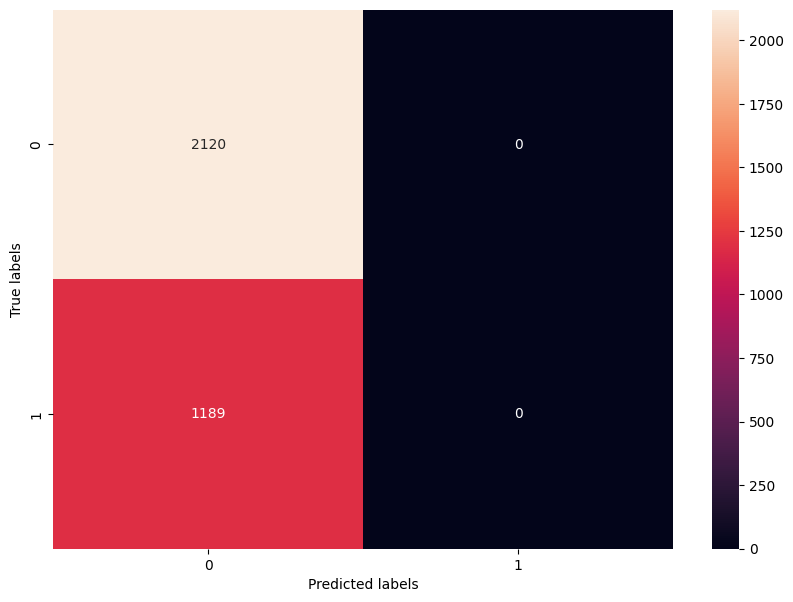

In [45]:
#confusion matrix plot

cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



In [47]:
# def model_predict(input_data):
#     input_tensor = torch.tensor(input_data, dtype=torch.float32)
#     deep_model.eval()
#     with torch.no_grad():
#         predictions = deep_model(input_tensor).numpy()
#     return predictions

# # Convert the train features to a numpy array (if not already done)
# train_features_np = train_features.numpy()

# # Initialize the SHAP explainer
# explainer = shap.Explainer(model_predict, train_features_np)

# # Calculate SHAP values
# shap_values = explainer(train_features_np)

# # Plot the SHAP values
# shap.summary_plot(shap_values, train_features_np, feature_names=X.columns)